In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from mpl_toolkits import mplot3d
from matplotlib import ticker
import healpy as hp
from astropy.io import fits


from matplotlib import rc
rc('text', usetex=True)
mpl.rcParams['axes.formatter.use_mathtext']=True
mpl.rcParams['figure.dpi']=90
wid=1.3
mpl.rcParams['axes.linewidth'] = wid #set the value globally
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Times']

mpl.rcParams['font.weight'] = 2.0

In [3]:
haslam = fits.open('../haslam/haslam408_dsds_Remazeilles2014.fits')
coords = fits.open('../haslam/pixel_coords_map_ring_galactic_res9.fits')

In [1]:
def freq(mass):
    return mass / (2*np.pi) / 6.58e-16 / 1e9

def mass_in_freq(freq):# freq in GHz
    return 2*np.pi * freq * 1e9 * 6.58e-16

def tele_details(tele_name):
    if tele_name == 'SKA-Mid':
        dsize = 15
        ndish = 5659
        T_rec = 20
        eta_coll = 0.8
        fname = '_SKA_Mid_'
    elif tele_name == 'SKA-Low':
        dsize = 35
        ndish = 1000
        T_rec = 40
        eta_coll = 0.8
        fname = '_SKA_Low_'
    elif tele_name == 'Hirax':
        dsize = 6
        T_rec = 50
        ndish = 1024
        eta_coll = 0.6
        fname = '_Hirax_'
    else:
        print('Telescope not included...')
        return
    return dsize, ndish, T_rec, eta_coll, fname

def fwhm_radio(mass_a, dsize=15):
    freq = mass_a / (2*np.pi) / 6.58e-16 / 1e9 # GHz
    fwhm = 0.7 * (1 / freq) * (15 / dsize)
    return fwhm # deg

/Users/samuelwitte/.local/lib/python3.8/site-packages/healpy/fitsfunc.py:368: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  warnings.warn(
/Users/samuelwitte/.local/lib/python3.8/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 512
  warnings.warn("NSIDE = {0:d}".format(nside))
/Users/samuelwitte/.local/lib/python3.8/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/Users/samuelwitte/.local/lib/python3.8/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))
/Users/samuelwitte/.local/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm 

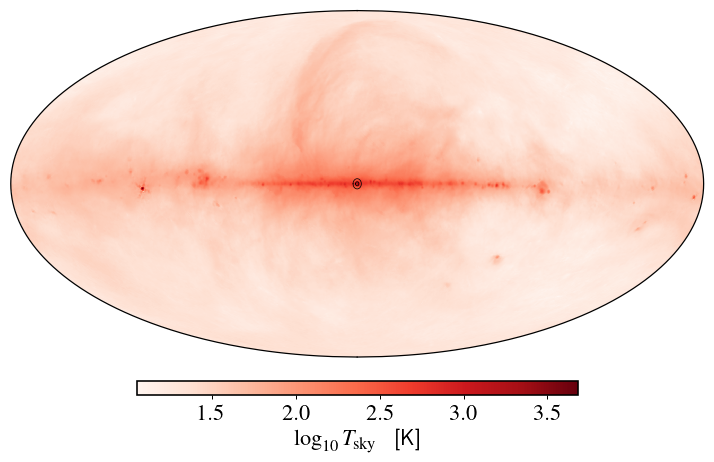

In [151]:
test = hp.read_map('../haslam/haslam408_dsds_Remazeilles2014.fits')
#hp.mollview(np.log10(test), coord=["G"], cmap=mpl.cm.get_cmap('YlGnBu'))
hp.mollview(np.log10(test), cmap=mpl.cm.get_cmap('Reds'), title="", cbar=None, xsize=2000)
hp.graticule(dmer=360,dpar=360,alpha=0) 

dsize, ndish, T_rec, eta_coll, fname = tele_details('SKA-Mid')
dsize2, ndish, T_rec, eta_coll, fname = tele_details('Hirax')
massA = mass_in_freq(0.408)
rmax_1 = fwhm_radio(massA, dsize=dsize) / 2
rmax_2 = fwhm_radio(massA, dsize=dsize2) / 2

r = np.full(100, rmax_1)
r2 = np.full(100, rmax_2)
phi = np.linspace(0., 2*np.pi, 100)
x = np.cos(phi)*r
y = np.sin(phi)*r
x2 = np.cos(phi)*r2
y2 = np.sin(phi)*r2
hp.projplot(x, y, c='k', lonlat=True, lw=0.6)
hp.projplot(x2, y2, c='k', lonlat=True, lw=.6)
fig = plt.gcf()
ax = plt.gca()
image = ax.get_images()[0]
cbar = fig.colorbar(image, ax=ax, shrink=0.6, location='bottom', pad=0.05, aspect=30)
cbar.ax.tick_params(labelsize=18) 
cbar.set_label(r"$\log_{{10}} T_{\rm sky} \hspace{.3cm}$  [K]", weight=2, fontsize=18)
plt.savefig("../plots/Haslam_Map.png", dpi=200)

In [4]:
freq(5e-7)

0.12093840660478367

In [147]:
fileN = np.loadtxt('../encounter_data/Interaction_params_PL_AScut_wStripping.txt')[:1000,:]
time = float(len(fileN[:,1])) / 3.4
inska = np.sum(np.sqrt(fileN[:,1]**2 + fileN[:,2]**2) <= rmax_1)

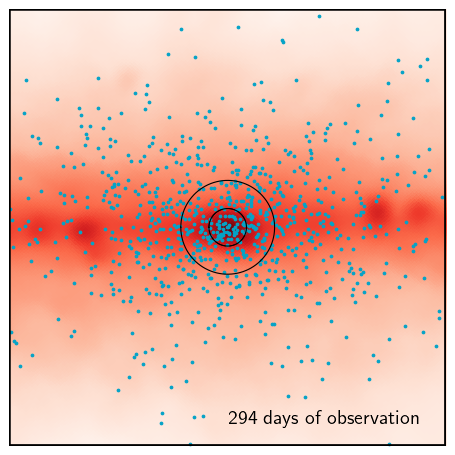

In [165]:
test = hp.read_map('../haslam/haslam408_dsds_Remazeilles2014.fits')
#hp.mollview(np.log10(test), coord=["G"], cmap=mpl.cm.get_cmap('YlGnBu'))
#hp.azeqview(np.log10(test), cmap=mpl.cm.get_cmap('Reds'), title="",xsize=1000)
hp.cartview(np.log10(test), cmap=mpl.cm.get_cmap('Reds'), title="",xsize=2000, lonra=[-10,10], latra=[-10,10], cbar=False)
#hp.graticule(dmer=360,dpar=360,alpha=0) 
hp.projplot(x, y, c='k', lonlat=True, lw=0.6)
fig = plt.gcf()
ax = plt.gca()
 
hp.projplot(fileN[:, 1], fileN[:,2], '.', c='#05A3C7', lonlat=True, mfc=None, markersize=4, alpha=1)
hp.projplot(x, y, c='k', lonlat=True, lw=.9)
hp.projplot(x2, y2, c='k', lonlat=True, lw=.9)
xboard = np.linspace(-10,10,100)
hp.projplot(xboard, np.ones(len(xboard))*10, lonlat=True, c='k', lw=2)
hp.projplot(xboard, np.ones(len(xboard))*-10, lonlat=True, c='k', lw=3)
hp.projplot(np.ones(len(xboard))*10, xboard, lonlat=True, c='k', lw=2)
hp.projplot(np.ones(len(xboard))*-10, xboard, lonlat=True, c='k', lw=3)
hp.projtext(0, -9, '{:.0f} days of observation'.format(time), fontsize=16,  lonlat=True)
plt.savefig("../plots/Haslam_MapZoom.png", dpi=200)

In [149]:
inska / 1e3

0.054

In [65]:
from scipy.integrate import dblquad

In [102]:
thetaD = 0.02
dblquad(lambda x,y: hp.get_interp_val(test, np.pi/2 + x, y)*np.cos(x), -thetaD, thetaD, lambda x: -thetaD, lambda x: thetaD, epsabs=1e-4, epsrel=1e-4)[0] /  (2*thetaD)**2

886.2771786933631

In [90]:
dblquad(lambda x,y: hp.get_interp_val(test, x, y)*np.cos(x), -thetaD, thetaD, lambda x: -thetaD, lambda x: thetaD)[0]

0.0673444984819991

In [103]:
0.02 * 180/np.pi

1.1459155902616465

In [138]:
time

294.11764705882354